# Problem statement
A car salesman like to develop a model to predtict the total dolar amount that customers are willing to pay given the following attributes:
* customer name
* customer email
* country
* gender
* age
* annual salary
* credit card debt
* net worth
THE MODEL SHOULD PREDICT:
* car purchase amount

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_df = pd.read_csv('Car_Purchasing_Data.csv' , encoding = 'ISO-8859-1')
car_df.head(5)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
X = car_df.drop(['Customer Name' , 'Customer e-mail' , 'Country' , 'Car Purchase Amount'] , axis = 1)

In [4]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [5]:
y = car_df['Car Purchase Amount']

In [6]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [7]:
X.shape

(500, 5)

In [8]:
y.shape

(500,)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [11]:
X_scaled.shape

(500, 5)

In [12]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [13]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [14]:
y = y.values.reshape(-1,1)

In [15]:
y.shape

(500, 1)

In [16]:
y_scaled = scaler.fit_transform(y)

In [17]:
#y_scaled

In [18]:
X_scaled.shape

(500, 5)

# training the model

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled, y_scaled , test_size = 0.25)

In [21]:
X_train.shape

(375, 5)

In [22]:
X_test.shape


(125, 5)

In [23]:
!pip install tensorflow
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(5, input_dim = 5, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

C:\Users\shabnam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66 (264.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')


In [26]:
epochs_hist = model.fit(X_train, y_train, epochs = 10, batch_size = 50, verbose = 1, validation_split = 0.2)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.3005 - val_loss: 0.2671
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2812 - val_loss: 0.2496
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2621 - val_loss: 0.2322
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2417 - val_loss: 0.2128
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2196 - val_loss: 0.1921
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1972 - val_loss: 0.1713
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1742 - val_loss: 0.1503
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1520 - val_loss: 0.1293
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1305 - val_loss: 0.1096
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1104 - val_loss: 0.0914


In [27]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

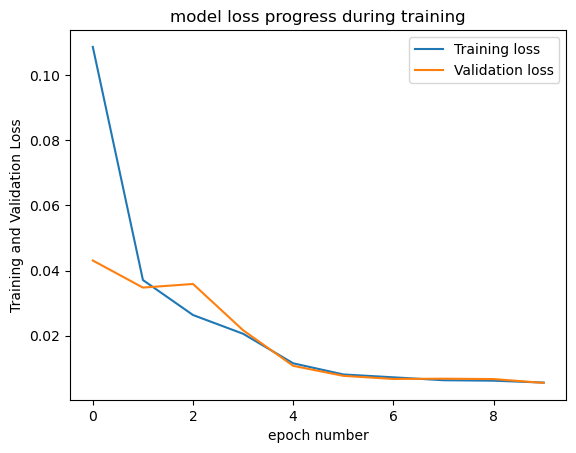

In [28]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('model loss progress during training')
plt.ylabel("Training and Validation Loss")
plt.xlabel('epoch number')
plt.legend(['Training loss','Validation loss'])

In [29]:
#Gender, Age, Annual Salary, Credit Card Debt, Net Worth
X_test = np.array([[1, 50, 50000, 10000, 600000]])
y_predict = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


In [30]:
print('expected purchase amout', y_predict)

expected purchase amout [[6194.457]]
